In [8]:
## This is used in the introduction to visualize the effect of the single line
import glob
import cv2
import skimage
import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Please change the data_dir to your own
data_dir = r"D:\Main\DKU\Senior\CS302_CV\projects\data"

In [12]:
images = sorted(glob.glob(f"{data_dir}/*.jpg")) # sort them according to frames
duration = 5 # 5 seconds
fps = 25

# the index of the line
line_idx = 400
thick = 2 # the thickness of the line (width)

In [ ]:
## Draw the original video 
video_writer = cv2.VideoWriter("visualize_line_origin.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (960, 540))
for f in tqdm.tqdm(images[:int(fps * duration)]):
    img = skimage.io.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    video_writer.write(img)
video_writer.release()

100%|██████████| 125/125 [00:02<00:00, 58.93it/s]


In [ ]:
## Draw the original video 


video_writer = cv2.VideoWriter("visualize_line_origin_line.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (960, 540))
for f in tqdm.tqdm(images[:int(fps * duration)]):
    img = skimage.io.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.line(img, (0, 400), (959, 400), (255, 0,0 ), thickness = 2)
    video_writer.write(img)
video_writer.release()

100%|██████████| 125/125 [00:01<00:00, 113.94it/s]


In [25]:
## Draw the scanline video
video_writer = cv2.VideoWriter("visualize_line_only.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (960, 540))
for f in tqdm.tqdm(images[:int(fps * duration)]):
    # img = skimage.io.imread(f)
    img = np.zeros((540, 960, 3))
    img[line_idx: line_idx + thick] = skimage.io.imread(f)[line_idx: line_idx+thick]
    img = np.uint8(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    video_writer.write(img)
video_writer.release()

100%|██████████| 125/125 [00:01<00:00, 93.62it/s]


100%|██████████| 125/125 [00:00<00:00, 189.70it/s]


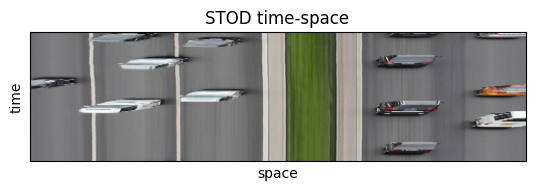

In [26]:
## Time-Space integral

result = []
for f in tqdm.tqdm(images[:int(fps * duration)]):
    res = skimage.io.imread(f)[line_idx: line_idx+thick] # [2, W, 3]
    img = np.uint8(res)
    result.append(img)
result = np.concat(result, axis = 0)

plt.title("STOD time-space")
plt.xlabel("space")
plt.ylabel("time")
plt.xticks([])
plt.yticks([])
plt.imshow(result)
# plt.axis("off")
plt.show()

In [35]:
## Draw the scanline video
video_writer = cv2.VideoWriter("visualize_line_time_space.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 10, (960, 540 + int(fps * duration * 2)  + 20))
img = np.zeros((int(fps * duration * 2), 960, 3))
ct = 0
for f in tqdm.tqdm(images[:int(fps * duration)]):
    img_raw = skimage.io.imread(f)
    img_raw = cv2.cvtColor(img_raw, cv2.COLOR_RGB2BGR)
    cv2.line(img_raw, (0, 400), (959, 400), (255, 0,0 ), thickness = 2)

    img[ct: ct + thick] = skimage.io.imread(f)[line_idx: line_idx+thick]
    img = np.uint8(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    video_writer.write(np.concat([img_raw, np.uint8(np.zeros((20, 960, 3))), img]))
    ct+=thick
video_writer.release()

100%|██████████| 125/125 [00:01<00:00, 66.50it/s]
